# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [ ]:
import math
N = 500 # the number of total costumers or people who went into the website
ads = 10 # the number of ads that we have
ads_selected = [] # a list that will contain the ads selcted by each costumer
numbers_of_selections = [0] * ads # a list that will contain the number of times a certain ad was selected
sums_of_rewards = [0] * ads # a list that contains the sum of the rewards that each ad got
total_reward = 0 # a variable that contains the total reward of all the ads
for n in range(N): #for loop to iterate through the whole dataset of 10000 people
  ad = 0 # a variable that contains the ad with the highest upper bound
  max_upper_bound = 0 # a maximum upper bound to compare with the the upper bound of each ad
  for i in range(ads):# a loop to iterate through all the ads
    if numbers_of_selections[i]!=0: # so we don not devide by zero
      average_reward = sums_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt((3/2)*(math.log(n + 1)/numbers_of_selections[i]))
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] +=1
  reward = dataset.values[n, ad]  
  sums_of_rewards[ad] += reward
  total_reward = total_reward + reward   

## Visualising the results

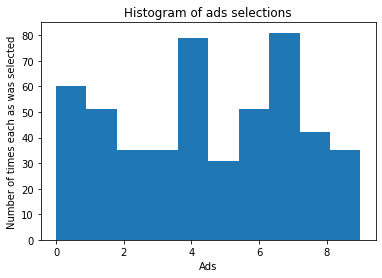

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each as was selected')
plt.show()